<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Seyyed Amirmahdi Sadrzadeh

**Student ID**: 401102015

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Logistic Regression

Logistic regression is a **supervised machine learning algorithm** primarily used for **binary classification tasks**. It predicts the probability of an outcome belonging to one of two classes (0 or 1) using a logistic function, specifically the **sigmoid function**, which maps any real-valued number into the range [0, 1].

### Key Features:
- **Binary Outcomes**: Logistic regression is suitable when the dependent variable is binary, such as yes/no or pass/fail.
- **Maximum Likelihood Estimation (MLE)**: Coefficients are estimated using MLE to maximize the likelihood of the observed data.
- **Interpretation**: The output can be interpreted as odds ratios, indicating how changes in independent variables affect the likelihood of an event.

### Types:
1. **Binary Logistic Regression**: Two possible outcomes.
2. **Multinomial Logistic Regression**: More than two categories.
3. **Ordinal Logistic Regression**: Ordered categories.

Logistic regression is widely used in fields like finance, healthcare, and social sciences for tasks such as risk assessment and disease diagnosis.

**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [2]:
# import necessary libraries
import numpy as np

class MyLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    # TODO: Implement a loss function for logistic regression, using binary cross-entropy as the loss metric.
    def loss(self, y_true, y_pred):
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            # prdicting using sigmoid
            y_pred = 1 / (1 + np.exp(-linear_model))

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Apply a sigmoid function and set a threshold (e.g., 0.5) to determine the binary outcome.
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = 1 / (1 + np.exp(-linear_model))
        return (y_pred >= 0.5).astype(int)

**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [3]:

# TODO: Load the dataset from Logistic_question.csv.
# Make sure to import necessary libraries for loading and handling CSV data (e.g., pandas, numpy).
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv")
# TODO: Make the 'Target' column binary if necessary.
# For example, you could map specific values to 0 and 1 based on conditions.
data['Target'] = data['Target'].apply(lambda x: 1 if x >= 0.5 else 0)
# TODO: Split the data into features (X) and target (y).
# Then, split the data into training and testing sets with an 80-20 split.
X = data.drop(columns="Target").values
y = data["Target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# TODO: Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# TODO: Create an instance of MyLogisticRegression.
# Fit the model on the training set (X_train, y_train).
model = MyLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)
# TODO: Predict the target values on the test set (X_test).
y_pred = model.predict(X_test)
# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision, recall, and F1-score.
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Model Evaluation Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 1.00
F1-Score: 0.93


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

**Your answer:**

**Accuracy:**

Accuracy measures the ratio of correctly predicted samples (both true positives and true negatives) to the total number of samples.

$Accuracy=
\frac{Total \ Samples \ True \ Positives+True \ Negatives}{Total \ Samples}$

Best suited for datasets with balanced classes (e.g., equal proportions of 0s and 1s). Also provides a general measure of how often the model is correct.

This is good for evaluating tasks like spam detection when spam and non-spam emails are equally distributed.

**Precision:**

Precision measures the ratio of true positives to all predicted positives.

$Precision = \frac{True \ Positives+False \ Positives}{True \ Positives}$

Precision is crucial when false positives are costly or undesirable.

This measure has medical usage. In diseases like cancer detection, false positives can lead to unnecessary stress, follow-up tests, or treatments.

Also, It is good for spam detection. Overclassifying legitimate emails as spam (false positives) can frustrate users.

**Recall:**

Recall measures the ratio of true positives to all actual positives.

$Recall= \frac{True \ Positives+False \ Negatives}{True \ Positives}$

Recall is crucial when false negatives (failing to identify a positive case) are more critical than false positives.

We use recall mostly for medical screening. Missing a disease diagnosis (false negatives) can be life-threatening. Also we use it for fraud detection in cases where missing fraudulent transactions may result in financial losses.

**F1-Score:**

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

$F1-Score=2⋅ \frac{Precision+Recall}{Precision⋅Recall}$

It is particularly useful when the dataset is imbalanced, as it considers both false positives and false negatives.

It is useful in search engines, by balancing between retrieving as many relevant results as possible (high recall) and minimizing irrelevant results (high precision).

Also useful for fraud detection.

**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# TODO: Create an instance of LogisticRegression from scikit-learn.
sklearn_model = LogisticRegression()
# TODO: Fit the built-in Logistic Regression model on the training set (X_train, y_train).
sklearn_model.fit(X_train, y_train)
# TODO: Use the trained model to predict on the test set (X_test).
y_pred_sklearn = sklearn_model.predict(X_test)
# TODO: Calculate and print the same evaluation metrics as before (e.g., accuracy, precision, recall, F1-score)
# to compare the performance of the custom model with the built-in Logistic Regression.
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Scikit-learn Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_sklearn:.2f}")
print(f"Precision: {precision_sklearn:.2f}")
print(f"Recall: {recall_sklearn:.2f}")
print(f"F1-Score: {f1_sklearn:.2f}")

Scikit-learn Logistic Regression Metrics:
Accuracy: 0.94
Precision: 0.93
Recall: 1.00
F1-Score: 0.97


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

**Your answer:**

The built-in LogisticRegression from scikit-learn slightly outperforms our custom implementation because it is optimized with advanced techniques like regularization, better convergence algorithms, and robust handling of numerical stability.

Also, Scikit-learn's implementation is highly optimized for performance, utilizing efficient libraries like BLAS and LAPACK. This leads to faster training and inference times compared to the custom implementation.

Scikit-learn has many important parameters. For instance, It has a penalty parameterwhich specifies the type of regularization to apply and a c parameter that Controls the strength of this regularization. Also, it has a parameter called solver which determines the optimization algorithm to use. The algorithms vary based on the size of the input data and its complexity. It also has a class_weight which adjusts weights for each class to handle class imbalance.

This parameters along many others, make Scikit-learn a better way.

# Multinomial Logistic Regression

Multinomial logistic regression is a statistical method used for **classifying outcomes** when the dependent variable has **more than two categories**. Unlike binary logistic regression, which handles only two possible outcomes, multinomial logistic regression can predict the probabilities of multiple discrete outcomes based on one or more independent variables, which can be continuous or categorical.

### Key Features:
- **Generalization of Logistic Regression**: It extends the binary logistic model to handle multiclass problems, making it suitable for scenarios like predicting consumer preferences or classifying types of jobs.
- **Probability Estimation**: The model estimates the probability of each category by calculating a score for each potential outcome and applying the softmax function to convert these scores into probabilities.
- **Modeling Approach**: It can be conceptualized as running multiple binary logistic regressions, where one category is treated as a reference (or pivot) against which others are compared.

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [7]:
class MyMultinomialLogisticRegression:
    # TODO: Initialize the class with necessary attributes, such as learning rate, number of iterations, and parameters (weights and bias).
    # Remember that, for multinomial logistic regression, weights will be a matrix with shape (n_features, n_classes).
    def __init__(self, learning_rate=0.01, num_iterations=1000, n_classes=None):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.n_classes = n_classes
        self.weights = None
        self.bias = None

    # TODO: Implement a loss function for multinomial logistic regression, using categorical cross-entropy as the loss metric.
    # This will calculate the average log loss across all classes for a given set of predictions.
    def loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), y_true])
        return np.sum(log_likelihood) / m

    # TODO: Implement the fit method to train the model. Use gradient descent to update the weights and bias based on the training data.
    # Ensure that the code is optimized to run on GPU if available (e.g., by using torch tensors on GPU).
    def fit(self, X, y):
        m, n_features = X.shape
        self.n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros((1, self.n_classes))

        y_one_hot = np.zeros((m, self.n_classes))
        y_one_hot[np.arange(m), y] = 1

        for i in range(self.num_iterations):
            # Compute scores and probabilities
            scores = np.dot(X, self.weights) + self.bias
            probs = np.exp(scores - np.max(scores, axis=1, keepdims=True))

            # Compute gradients
            dw = np.dot(X.T, (probs - y_one_hot)) / m
            db = np.sum(probs - y_one_hot, axis=0, keepdims=True) / m

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # TODO: Implement the predict function that uses the learned weights and bias to output predictions on new data.
    # Use the softmax function to generate probabilities for each class, and assign each sample to the class with the highest probability.
    def predict(self, X):
        scores = np.dot(X, self.weights) + self.bias
        probs = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        return np.argmax(probs, axis=1)

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# TODO: Load the dataset.
# Make sure to import necessary libraries for handling CSV data (e.g., pandas, numpy).
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Logistic_question.csv')
# TODO: Quantize the 'Target' column into `i` levels, where `i` ranges from 2 to 10.
# This means dividing the target values into `i` evenly spaced bins and assigning each value to a bin index (label).
target_column = 'Target'
features = data.drop(columns=[target_column])
target = data[target_column]
# TODO: For each value of `i` (from 2 to 10):
results = {}
for i in range(2, 11):
#       - Quantize the target column based on the current `i` value.
    target_quantized = pd.qcut(target, q=i, labels=range(i)).astype(int)

#       - Split the data into features (X) and quantized target (y).
    X = features.values
    y = target_quantized.values

#       - Split the data into training and testing sets with an 80-20 split.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#       - Normalize the training data (X_train) and use the same scaling parameters to normalize X_test.
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
# TODO: Create an instance of MyMultinomialLogisticRegression.
# Fit the model on the training set (X_train, y_train).
    model = MyMultinomialLogisticRegression(learning_rate=0.1, num_iterations=5000)
    model.fit(X_train, y_train)

# TODO: Predict the target values on the test set (X_test).
    y_pred = model.predict(X_test)

# TODO: Calculate and print 4 different evaluation metrics on the test set predictions.
# Suggested metrics: accuracy, precision (macro-averaged), recall (macro-averaged), and F1-score (macro-averaged).
# You may want to import these metrics from sklearn (e.g., accuracy_score, precision_score, recall_score, f1_score).
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Metrics for {i} levels of quantization:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (macro-averaged): {precision:.4f}")
    print(f"  Recall (macro-averaged): {recall:.4f}")
    print(f"  F1-Score (macro-averaged): {f1:.4f}")

    results[i] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

Metrics for 2 levels of quantization:
  Accuracy: 0.8750
  Precision (macro-averaged): 0.8747
  Recall (macro-averaged): 0.8747
  F1-Score (macro-averaged): 0.8747
Metrics for 3 levels of quantization:
  Accuracy: 0.7125
  Precision (macro-averaged): 0.7063
  Recall (macro-averaged): 0.7151
  F1-Score (macro-averaged): 0.6900
Metrics for 4 levels of quantization:
  Accuracy: 0.6125
  Precision (macro-averaged): 0.6042
  Recall (macro-averaged): 0.5990
  F1-Score (macro-averaged): 0.5558
Metrics for 5 levels of quantization:
  Accuracy: 0.4500
  Precision (macro-averaged): 0.4405
  Recall (macro-averaged): 0.4599
  F1-Score (macro-averaged): 0.4035
Metrics for 6 levels of quantization:
  Accuracy: 0.3500
  Precision (macro-averaged): 0.2818
  Recall (macro-averaged): 0.3501
  F1-Score (macro-averaged): 0.2787
Metrics for 7 levels of quantization:
  Accuracy: 0.3250
  Precision (macro-averaged): 0.2115
  Recall (macro-averaged): 0.3137
  F1-Score (macro-averaged): 0.2185
Metrics for 8 le

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

**Your answer:**

We use the visualization below:


Best performance achieved at quantization level i=2

Performance Metrics at Best Quantization Level:
accuracy     0.875000
precision    0.874687
recall       0.874687
f1_score     0.874687
Name: 2, dtype: float64


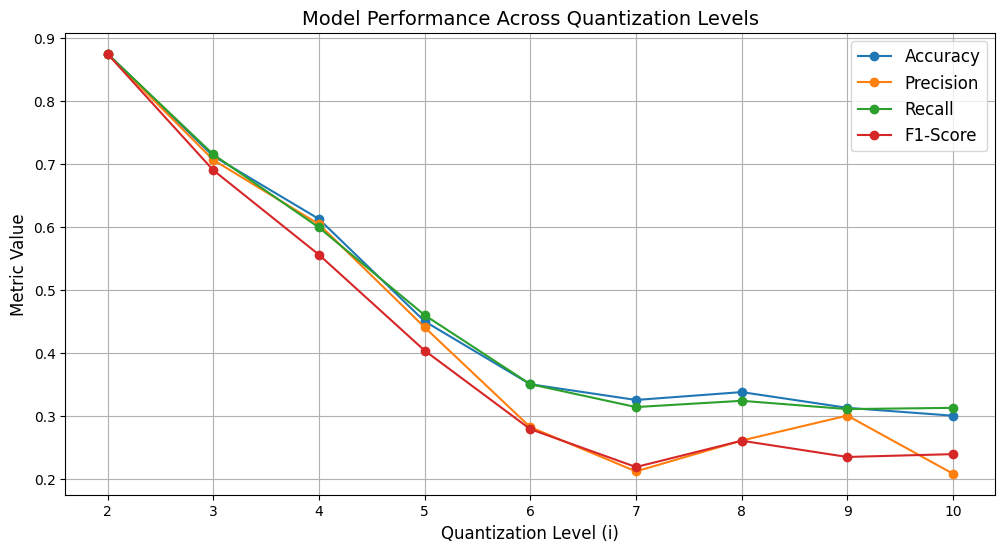

In [9]:
import matplotlib.pyplot as plt

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame.from_dict(results, orient='index')

# Determine the best quantization level based on F1-Score (can change to other metrics)
best_i = results_df['f1_score'].idxmax()
print(f"\nBest performance achieved at quantization level i={best_i}")

# Display corresponding metrics
print("\nPerformance Metrics at Best Quantization Level:")
print(results_df.loc[best_i])

# Plot metrics for each quantization level
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['accuracy'], label='Accuracy', marker='o')
plt.plot(results_df.index, results_df['precision'], label='Precision', marker='o')
plt.plot(results_df.index, results_df['recall'], label='Recall', marker='o')
plt.plot(results_df.index, results_df['f1_score'], label='F1-Score', marker='o')

# Formatting the plot
plt.title("Model Performance Across Quantization Levels", fontsize=14)
plt.xlabel("Quantization Level (i)", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.xticks(results_df.index)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

You can see that as i increases, the metrics decrease because of the higher classification complexity and potential overfitting. So the the best i is i=2.

# Going a little further!(bonus*)

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [1]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

KeyboardInterrupt: 

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [ ]:

# TODO: Import the pandas library to handle data manipulation and analysis.

# TODO: Load the dataset into a pandas DataFrame.

# TODO: Check for null entries in each column using the .isnull().sum() method.
# This will give the number of null entries for each column.

# TODO: Calculate the total number of null entries in the dataset by summing the null values across all columns.

# TODO: Print the number of null entries per column and the total number of null entries in the dataset.

**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

**Your answer:**

**Task:** Handle null entries using your best method.

In [ ]:

# TODO: Determine the best method for handling null entries.
# Options include:
# - Dropping rows with null values using .dropna() if they are few in number.
# - Filling null values with a specific value (e.g., mean, median, or mode) using .fillna().
# - Consider more sophisticated methods, such as interpolation or model-based imputation, if appropriate.

# TODO: Implement the chosen method to handle null entries in the dataset.
# For example, if dropping rows, use:
# data_cleaned = data.dropna()

# TODO: If filling null values, decide on the strategy (mean, median, mode) for each relevant column.
# For example:
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)

# TODO: After handling null entries, verify that there are no more null values in the dataset.
# This can be done using the .isnull().sum() method again.

# TODO: Print the results to confirm that null entries have been handled successfully.

**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [ ]:
# TODO: Convert categorical features to numerical values using appropriate encoding methods.
# Options include one-hot encoding with pd.get_dummies() or label encoding using sklearn's LabelEncoder.

# TODO: Split the dataset into features (X) and target (y).
# For example, set X to all columns except the target and y to the target column.

# TODO: Use train_test_split from sklearn to split the dataset into training and testing sets with an 80-20 ratio.
# Set random_state for reproducibility.

# TODO: Normalize the features using a method such as StandardScaler or MinMaxScaler.
# Fit the scaler on X_train and transform both X_train and X_test.

# TODO: Import the LogisticRegression model and GridSearchCV from sklearn.
# Create an instance of LogisticRegression and specify the parameters you want to tune.

# TODO: Define a parameter grid for GridSearchCV to search over.
# This should include hyperparameters such as 'C' (regularization strength), 'solver', etc.

# TODO: Fit the GridSearchCV to the training data (X_train, y_train).
# Ensure you specify the scoring metric you want to optimize (e.g., accuracy).

# TODO: Retrieve the best model and its parameters from GridSearchCV.
# Print the best parameters found by GridSearchCV.

# TODO: Evaluate the best model on the training set and the test set.
# Calculate and print the training and testing accuracy.

# TODO: Print the results to summarize the model performance.

**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [ ]:
# TODO: Set the value of i to 10 for splitting the training data into parts.

# TODO: Split X_train into i parts. You can use numpy's array_split function or similar methods.
# This will create a list of subsets of X_train and the corresponding subsets of y_train.

# TODO: Initialize a list to store the models trained on each part of the data.

# TODO: For each part (subset) of the training data:
#       - Create an instance of your custom MyLogisticRegression model.
#       - Fit the model on the subset (X_part, y_part).
#       - Store the trained model in the list of models.

# TODO: Define the three ensemble methods you want to implement.

# TODO: Evaluate and compare the test accuracy of each ensemble method on X_test.
# Print the test accuracy for each ensemble method.

# TODO: Based on the results, determine which ensemble method performed the best on the test set.

**Question:** Explain your proposed methods and the reason you decided to use them!

**Your answer:**

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

In [ ]:
# TODO: Initialize lists to store the values of i, training accuracies, and testing accuracies.

# TODO: Create a loop to iterate over the range of i from 2 to 100:

# TODO: After the loop, determine the best value of i based on the test accuracy.

# TODO: Print the best value of i, along with the corresponding training and test accuracy of the best model.

# TODO: Plot the training and testing accuracies against i.
# Use a line plot to visualize the performance as i changes from 2 to 100.
# Make sure to label the axes and provide a title for the plot.

**Question:** Analyze the results.

**Your Answer:**